<a href="https://colab.research.google.com/github/Nishika2900/Walmart_CaseStudy/blob/alpha/Walmart_CI_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Objective

### Objective
Analyze customer purchase behavior at Walmart with a focus on gender-based spending differences. The analysis will involve data preparation, exploratory data analysis (EDA), statistical analysis, segmentation analysis, and deriving actionable business insights.

### Process

1. **Data Preparation**
   - **Import Libraries**: Use the following libraries:
     - `pandas` for data manipulation
     - `numpy` for numerical operations
     - `matplotlib.pyplot` and `seaborn` for visualization
     - `scipy.stats` for statistical analysis
   - **Import Dataset**: Load the transactional dataset from Walmart.
   - **Inspect Data**: Check the structure and characteristics of the dataset.
   - **Data Cleaning**: Address missing values and outliers to ensure data quality. Convert relevant columns to appropriate data types (e.g., categorical variables).

2. **Exploratory Data Analysis (EDA)**
   - **Analyze Spending Patterns**: Track and visualize spending amounts for male and female customers.
   - **Calculate Averages**: Compute average spending for each gender.
   - **Visualizations**: Use histograms, boxplots, and heatmaps to explore and compare spending patterns.

3. **Statistical Analysis**
   - **Central Limit Theorem (CLT)**: Apply CLT to estimate confidence intervals for average spending for male and female customers.
   - **Confidence Intervals**: Experiment with different confidence levels (90%, 95%, 99%) to understand the precision and variability of the spending estimates.
   - **Compare Intervals**: Assess whether the confidence intervals for male and female spending overlap, and draw conclusions based on the comparison.

4. **Segmentation Analysis**
   - **Marital Status**: Analyze spending patterns for married vs. unmarried customers.
   - **Age Groups**: Segment customers into age bins (e.g., 0-17, 18-25, 26-35, 36-50, 51+ years) and evaluate spending behavior across these segments.

5. **Business Insights and Recommendations**
   - **Summarize Findings**: Provide a summary of insights derived from the data analysis.
   - **Actionable Recommendations**: Offer clear, actionable recommendations for Walmart based on the analysis.

6. **Final Presentation**
   - **Document Analysis**: Prepare a detailed report documenting the analysis process, findings, and recommendations.
   - **Generate Report**: Convert the analysis notebook into a PDF report, ensuring all visualizations and textual comments are included.
   - **Share Report**: Upload the PDF report to Google Drive and share the link as required.

### Libraries Required
- `pandas`: For data manipulation and cleaning.
- `numpy`: For numerical computations.
- `matplotlib.pyplot`: For creating plots and visualizations.
- `seaborn`: For advanced visualizations and statistical plots.
- `scipy.stats`: For statistical analysis, including confidence intervals.
- `sklearn.preprocessing`: For encoding categorical variables (if needed).


## 1. Data Preparation


###  1.1 Import Libraries


In [1]:
#1: Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, expon, norm
import scipy.stats as stats
import math

### 1.2 Load Dataset


In [2]:
#2: Loading the Dataset
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?16")
data


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### 1.3 Inspect Data

In [3]:
#3: Displaying Dataset Information
data.info()
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


### 1.4 Data Cleaning

In [4]:
#4: Checking for Missing Values
df = data.copy()
print(df.dtypes)
print(df.shape)

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object
(550068, 10)


In [5]:
# Print data types before conversion
print("Data types before conversion:")
print(df.dtypes)

# Convert only columns that should be numeric
numeric_cols = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Print missing values counts for the numeric columns
print("\nMissing values counts before dropping NaNs:")
print(df.isnull().sum())

# Drop rows with NaN values
df.dropna(inplace=True)

# Print missing values counts after dropping NaNs
print("\nMissing values counts after dropping NaNs:")
print(df.isnull().sum())

# Print data types after conversion
print("\nData types after conversion:")
print(df.dtypes)


Data types before conversion:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Missing values counts before dropping NaNs:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Missing values counts after dropping NaNs:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City

### Outlier Detection and Treatment

<Axes: >

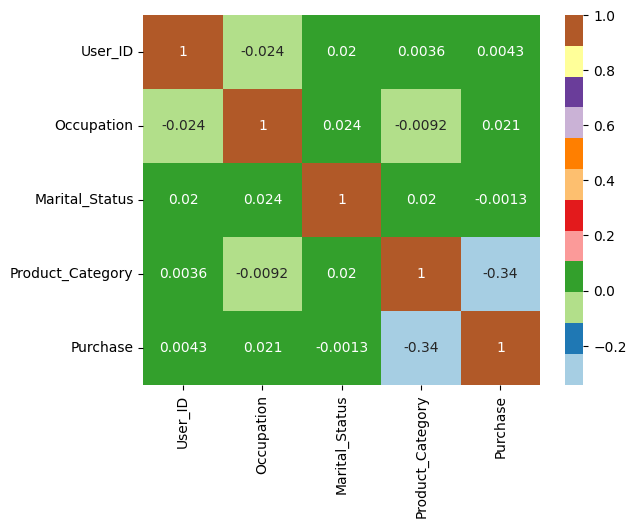

In [6]:
#5: Removing Outliers and Plotting Heatmap
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df[numeric_cols] = df[numeric_cols].loc[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
fig, ax = plt.subplots(1, 1)
sns.heatmap(df[numeric_cols].corr(), cmap='Paired', annot=True)


In [7]:
#6: Dropping Duplicates
df.drop_duplicates(inplace=True)
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001.0,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001.0,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001.0,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001.0,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002.0,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
550008,NaN,P00370853,F,55+,NaN,A,0,NaN,NaN,NaN
550012,NaN,P00370853,M,0-17,NaN,B,0,NaN,NaN,NaN
550013,NaN,P00375436,M,46-50,NaN,A,2,NaN,NaN,NaN
550018,NaN,P00372445,F,46-50,NaN,A,3,NaN,NaN,NaN


## 2. Exploratory Data Analysis (EDA)


In [8]:
#7: Value Counts for Various Columns
df['Product_ID'].value_counts()
df['Gender'].value_counts()
df['Age'].value_counts()
df['Occupation'].value_counts()
df['City_Category'].value_counts()
df['Stay_In_Current_City_Years'].value_counts()
df['Marital_Status'].value_counts()
df['Product_Category'].value_counts()


Product_Category
5.0     150933
1.0     140378
8.0     113925
11.0     24287
2.0      23864
6.0      20466
3.0      20213
4.0      11753
16.0      9828
15.0      5963
13.0      5549
12.0      3947
7.0       3721
18.0      3125
10.0      2850
14.0      1523
17.0       578
9.0        335
Name: count, dtype: int64

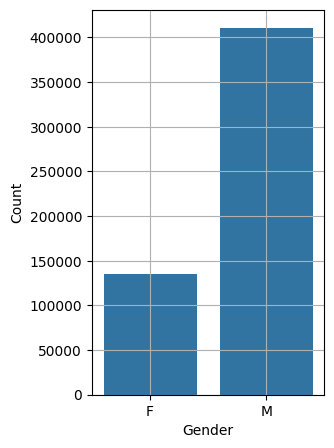

In [9]:
#8: Gender Classification and Plotting
females = df[df['Gender'] == 'F']
males = df[df['Gender'] == 'M']
fig, ax = plt.subplots(1, 1, figsize=(3, 5))
sns.countplot(data=df, x='Gender')
plt.ylabel('Count')
plt.grid()


## 3. Statistical Analysis
### - Central Limit Theorem (CLT)
### - Confidence Intervals
### - Interval Comparison

Confidence Interval for Male Purchases (95.0%): (nan, nan)
Confidence Interval for Female Purchases (95.0%): (nan, nan)


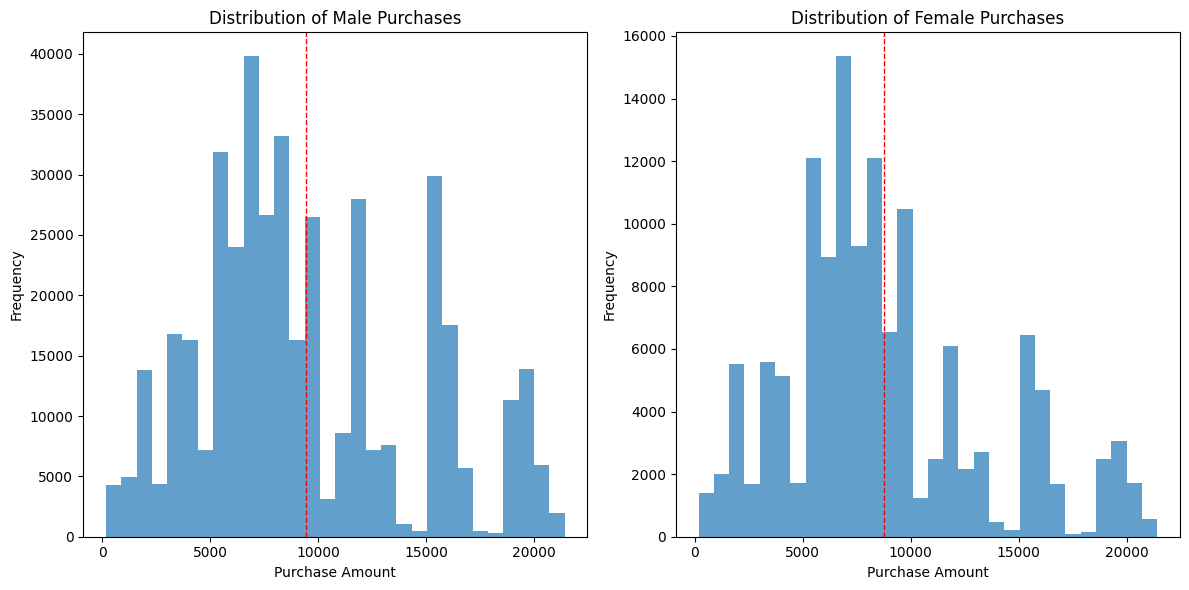

Do the confidence intervals overlap? 
 Yes


In [10]:
df2 = df.copy()
male_purchases = df2[df2['Gender'] == 'M']['Purchase']
female_purchases = df2[df2['Gender'] == 'F']['Purchase']

def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return interval

# Calculate confidence intervals for both genders
confidence_level = 0.95
male_ci = calculate_confidence_interval(male_purchases, confidence=confidence_level)
female_ci = calculate_confidence_interval(female_purchases, confidence=confidence_level)

print(f"Confidence Interval for Male Purchases ({confidence_level*100}%): {male_ci}")
print(f"Confidence Interval for Female Purchases ({confidence_level*100}%): {female_ci}")

# Plot distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(male_purchases, bins=30, alpha=0.7, label='Male Purchases')
plt.axvline(np.mean(male_purchases), color='r', linestyle='dashed', linewidth=1)
plt.axvline(male_ci[0], color='g', linestyle='dashed', linewidth=1)
plt.axvline(male_ci[1], color='g', linestyle='dashed', linewidth=1)
plt.title('Distribution of Male Purchases')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(female_purchases, bins=30, alpha=0.7, label='Female Purchases')
plt.axvline(np.mean(female_purchases), color='r', linestyle='dashed', linewidth=1)
plt.axvline(female_ci[0], color='g', linestyle='dashed', linewidth=1)
plt.axvline(female_ci[1], color='g', linestyle='dashed', linewidth=1)
plt.title('Distribution of Female Purchases')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compare confidence intervals
def compare_intervals(ci1, ci2):
    overlap = not (ci1[1] < ci2[0] or ci2[1] < ci1[0])
    return overlap

interval_overlap = compare_intervals(male_ci, female_ci)
print(f"Do the confidence intervals overlap? \n {'Yes' if interval_overlap else 'No'}")

In [11]:
#9: Age Classification and Grouping
def grouping(x):
    age_range = x['Age']
    if age_range == '0-17':
        return 'Group 1'
    elif age_range == '18-25':
        return 'Group 2'
    elif age_range == '26-35':
        return 'Group 3'
    elif age_range == '36-45':
        return 'Group 4'
    elif age_range == '46-50':
        return 'Group 5'
    elif age_range == '51-55':
        return 'Group 6'
    elif age_range == '55+':
        return 'Group 7'
    else:
        return age_range

df['Age'] = df.apply(grouping, axis=1)
df['Age'].value_counts()
print(df.head())


     User_ID Product_ID Gender      Age  Occupation City_Category  \
0  1000001.0  P00069042      F  Group 1        10.0             A   
1  1000001.0  P00248942      F  Group 1        10.0             A   
2  1000001.0  P00087842      F  Group 1        10.0             A   
3  1000001.0  P00085442      F  Group 1        10.0             A   
4  1000002.0  P00285442      M  Group 7        16.0             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2             0.0               3.0    8370.0  
1                          2             0.0               1.0   15200.0  
2                          2             0.0              12.0    1422.0  
3                          2             0.0              12.0    1057.0  
4                         4+             0.0               8.0    7969.0  


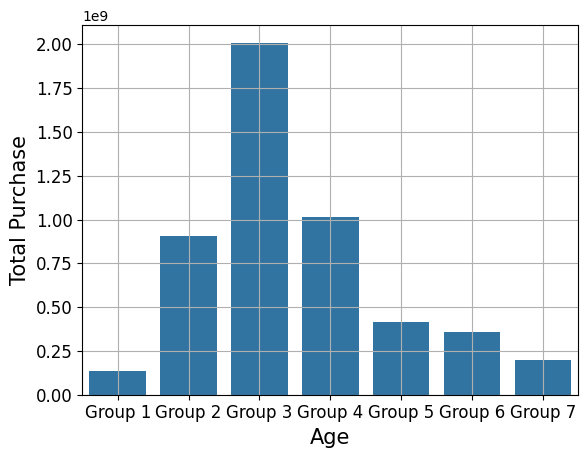

In [12]:
#10: Plotting Age vs Purchase
pr = df.groupby('Age')['Purchase'].agg(['sum']).reset_index()
sns.barplot(data=pr, x='Age', y='sum')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Total Purchase', fontsize=15)
plt.grid()


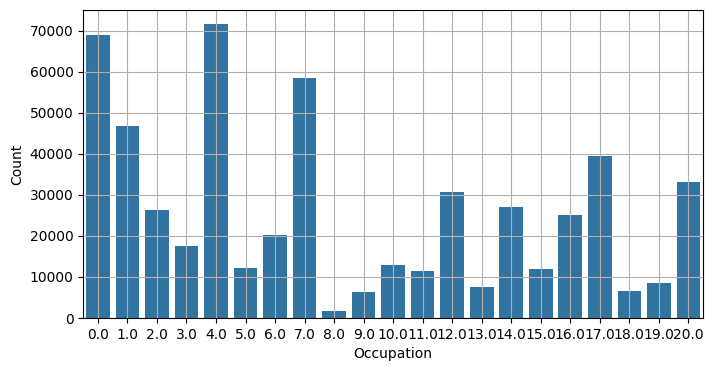

In [13]:
#11: Occupation Classification and Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(data=df, x='Occupation')
plt.ylabel("Count")
plt.grid()


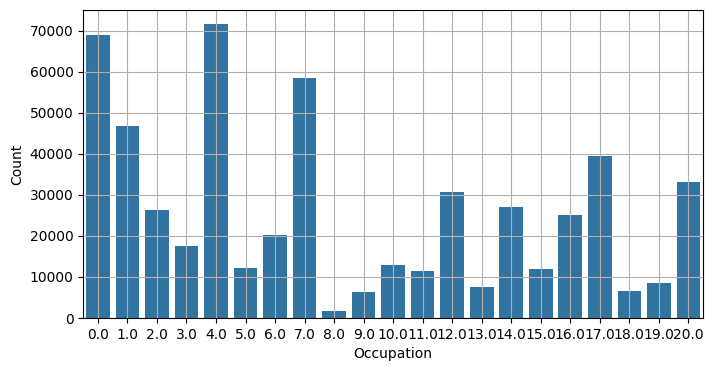

In [14]:
#11: Occupation Classification and Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(data=df, x='Occupation')
plt.ylabel("Count")
plt.grid()


<ipython-input-15-a6ae5e4294f5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


[Text(0, 0, 'Group 1'),
 Text(1, 0, 'Group 7'),
 Text(2, 0, 'Group 3'),
 Text(3, 0, 'Group 5'),
 Text(4, 0, 'Group 6'),
 Text(5, 0, 'Group 4'),
 Text(6, 0, 'Group 2')]

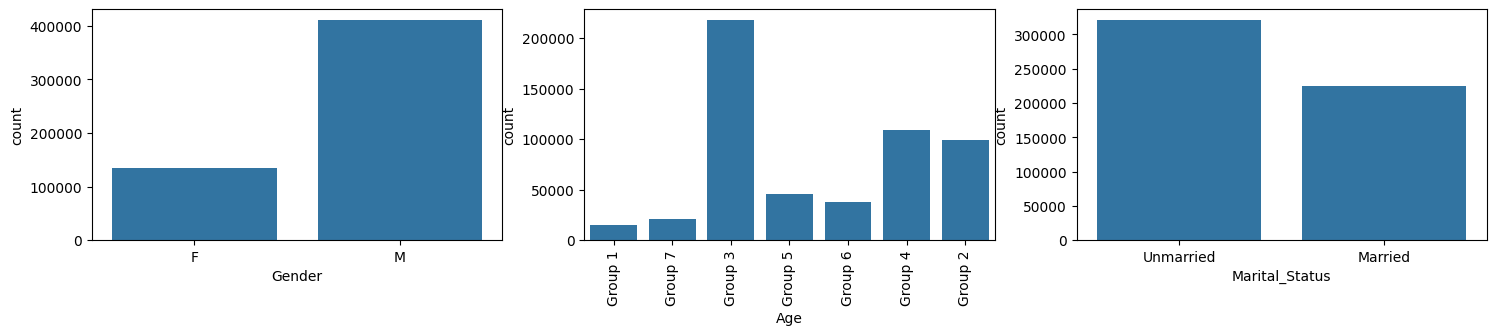

In [15]:
#13: Marital Status Classification and Plotting
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Unmarried' if x == 0 else 'Married')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))
sns.countplot(data=df, x='Gender', ax=axes[0])
sns.countplot(data=df, x='Age', ax=axes[1])
sns.countplot(data=df, x='Marital_Status', ax=axes[2])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


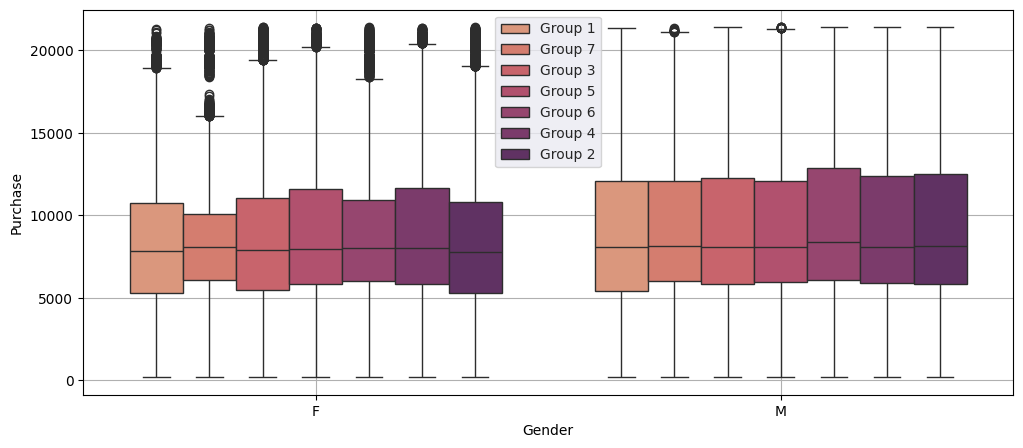

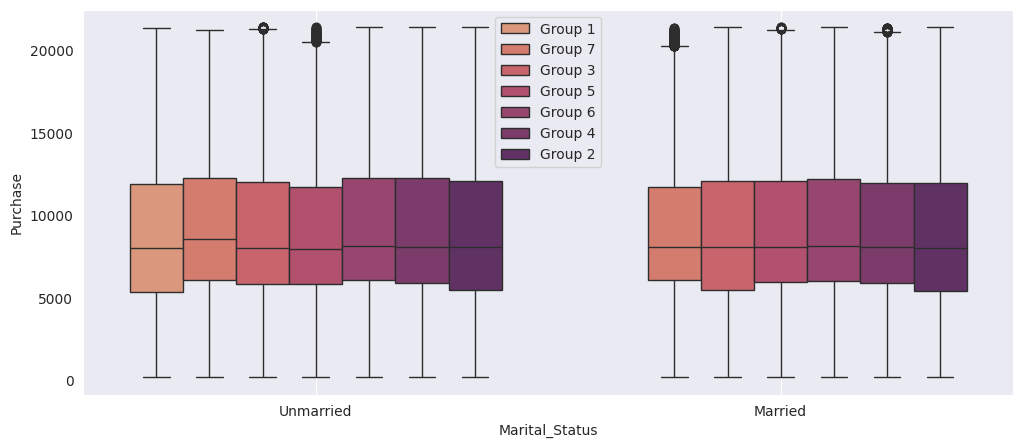

In [16]:
#14: Boxplots
fig, zx = plt.subplots(1, 1, figsize=(12, 5))
sns.boxplot(data=df, x='Gender', y='Purchase', hue='Age', palette='flare')
sns.set_style('darkgrid')
plt.legend()
plt.grid()

fig, zx = plt.subplots(1, 1, figsize=(12, 5))
sns.boxplot(data=df, x='Marital_Status', y='Purchase', hue='Age', palette='flare')
sns.set_style('darkgrid')
plt.legend()
plt.grid()


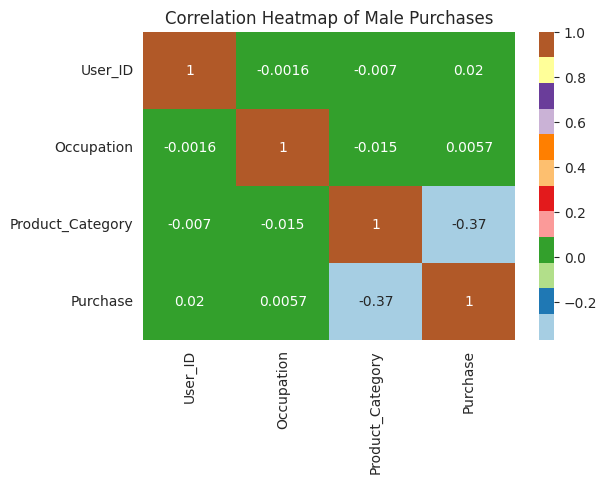

In [17]:
#15: Removing Outliers for Male Purchases
male = df[df['Gender'] == 'F']

# Calculate the IQR for the Purchase column and remove outliers
Q1 = male['Purchase'].quantile(0.25)
Q3 = male['Purchase'].quantile(0.75)
IQR = Q3 - Q1
male = male.loc[~((male['Purchase'] < (Q1 - 1.5 * IQR)) | (male['Purchase'] > (Q3 + 1.5 * IQR)))]

# Select only numeric columns for correlation
numeric_columns = male.select_dtypes(include=['number'])

# Plot heatmap of the correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.heatmap(numeric_columns.corr(), cmap='Paired', annot=True, ax=ax)
plt.title('Correlation Heatmap of Male Purchases')
plt.show()


## Distribution of Spending by Gender:

> Histogram Analysis: The histograms for male and female purchases show the distribution of spending amounts. The confidence intervals provide a range within which the true mean spending for each gender lies. If these intervals overlap, it indicates that there is no significant difference in average spending between genders.
Boxplot Analysis: The boxplots reveal the spread of spending amounts and any potential outliers. They help in understanding the central tendency and variability of spending by gender, marital status, and age groups.
Age-Based Spending:

> Bar Plot Analysis: The bar plot for age groups shows total spending by different age bins. This helps in understanding which age groups contribute most to the total sales.
Marital Status Analysis:

> Count Plots: These plots compare spending patterns based on marital status. It highlights whether spending differs significantly between married and unmarried customers.
Outlier Detection:

> Heatmaps: The heatmaps of correlation matrices help in understanding relationships between various numeric features after outlier removal. They indicate how strongly different variables are correlated.
Recommendations
Gender-Based Insights:

> Recommendation: If the confidence intervals for male and female spending overlap, Walmart should consider other factors, such as product preferences or marketing strategies, rather than gender-based strategies. If they do not overlap, Walmart could tailor marketing campaigns specifically for the gender that spends more.
## Age-Based Marketing :

### Recommendations :
- Since different age groups contribute differently to sales, Walmart should develop targeted promotions for age groups with higher spending. For instance, if the 26-35 age group spends significantly more, special offers and advertisements could be tailored for this demographic.
Marital Status Targeting:

- If there are significant differences in spending between married and unmarried customers, Walmart can customize their product offerings and marketing strategies to appeal more effectively to each group.
Data Quality Improvement:

- Continue monitoring and cleaning data to handle outliers and missing values, ensuring that the analysis remains accurate and relevant.
General Strategies:

> #### Action Item:
 Based on the overall analysis, Walmart should consider implementing data-driven strategies that align with observed spending patterns and demographics. This could involve adjusting product prices, offering discounts, or improving customer engagement efforts to boost sales across different segments.